In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
#from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression  as  LR  # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet as ELNET, ElasticNetCV  # Regularization

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV , KFold # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
#import roc_auc_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model
## 4) Classification Models
from sklearn.linear_model import LogisticRegression as LGR
from scipy.stats import loguniform, uniform
from sklearn.ensemble import GradientBoostingClassifier
#random_forest
from sklearn.ensemble import RandomForestClassifier as RDF
#KNN
from sklearn.neighbors import KNeighborsClassifier
#SVM
from sklearn.svm import SVC
#Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB , MultinomialNB, BernoulliNB
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Histogram Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier as HGB
from sklearn.ensemble import HistGradientBoostingRegressor as HGBR


from xgboost import XGBClassifier as XGB
from xgboost import XGBRFRegressor as XGBR
from xgboost import plot_importance
from xgboost import plot_tree


from sklearn import set_config  # force digram to show everything even not in sklearn library
 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import set_config  # force digram to show everything even not in sklearn library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,  roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#df= pd.read_excel('Data_Train.xlsx')

In [3]:
#df.to_parquet('df.parquet')

In [4]:
df = pd.read_parquet('df.parquet')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df1=df[['Source','Destination']].copy()
df1
df1.to_csv('df1.csv')

In [7]:
df2=df[['Route']].copy()
df2
df2.to_csv('df2.csv')

In [8]:
import pandas as pd
import numpy as np

# 1. Load your dataset
# Make sure 'df2.csv' is in the same folder where you run this script
df2 = pd.read_csv('df2.csv')

# 2. Define Airport Coordinates
airport_coords = {
    'AMD': (23.0772, 72.6347), 'ATQ': (31.7096, 74.8005), 'BBI': (20.2444, 85.8178),
    'BDQ': (22.3368, 73.2271), 'BHO': (23.2875, 77.3377), 'BLR': (13.1979, 77.7063),
    'BOM': (19.0887, 72.8679), 'CCU': (22.6547, 88.4467), 'COK': (10.1520, 76.4019),
    'DED': (30.1897, 78.1803), 'DEL': (28.5562, 77.1000), 'GAU': (26.1061, 91.5859),
    'GOI': (15.3808, 73.8314), 'GWL': (26.2933, 78.2276), 'HBX': (15.3617, 75.0850),
    'HYD': (17.2403, 78.4294), 'IDR': (22.7217, 75.8011), 'IMF': (24.7600, 93.8967),
    'ISK': (20.1182, 73.9113), 'IXA': (23.8860, 91.2405), 'IXB': (26.6812, 88.3286),
    'IXC': (30.6735, 76.7885), 'IXR': (23.3143, 85.3217), 'IXU': (19.8627, 75.3981),
    'IXZ': (11.6410, 92.7297), 'JAI': (26.8242, 75.8122), 'JDH': (26.2513, 73.0484),
    'JLR': (23.1778, 80.0522), 'KNU': (26.4028, 80.3650), 'LKO': (26.7606, 80.8893),
    'MAA': (12.9900, 80.1693), 'NAG': (21.0922, 79.0472), 'NDC': (19.1833, 77.3167),
    'PAT': (25.5913, 85.0880), 'PNQ': (18.5822, 73.9197), 'RPR': (21.1804, 81.7388),
    'STV': (21.1140, 72.7420), 'TRV': (8.4821, 76.9201), 'UDR': (24.6177, 73.8961),
    'VGA': (16.5300, 80.7970), 'VNS': (25.4523, 82.8591), 'VTZ': (17.7211, 83.2245)
}

# 3. Define Haversine Function (calculates distance between points on Earth)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# 4. Calculate Distance for Each Route
def calculate_total_distance(route):
    if pd.isna(route):
        return 0
    airports = route.split(' → ')
    total_dist = 0
    for i in range(len(airports) - 1):
        origin = airports[i]
        dest = airports[i+1]
        
        if origin in airport_coords and dest in airport_coords:
            lat1, lon1 = airport_coords[origin]
            lat2, lon2 = airport_coords[dest]
            total_dist += haversine(lat1, lon1, lat2, lon2)
            
    return round(total_dist, 2)

df['Route_Distance_km'] = df['Route'].apply(calculate_total_distance)

# 5. Save the file
df.to_csv('df2_with_distance.csv', index=False)
print("File saved successfully as 'df2_with_distance.csv'")

File saved successfully as 'df2_with_distance.csv'


In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Distance_km
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1708.92
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1839.05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2670.61
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1874.45
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1742.12
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,1546.84
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,1546.84
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,1708.92
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1708.92


In [10]:
df = df[df['Price']<17000]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10342 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10342 non-null  object 
 1   Date_of_Journey    10342 non-null  object 
 2   Source             10342 non-null  object 
 3   Destination        10342 non-null  object 
 4   Route              10341 non-null  object 
 5   Dep_Time           10342 non-null  object 
 6   Arrival_Time       10342 non-null  object 
 7   Duration           10342 non-null  object 
 8   Total_Stops        10341 non-null  object 
 9   Additional_Info    10342 non-null  object 
 10  Price              10342 non-null  int64  
 11  Route_Distance_km  10342 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10342 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10342 non-null  object 
 1   Date_of_Journey    10342 non-null  object 
 2   Source             10342 non-null  object 
 3   Destination        10342 non-null  object 
 4   Route              10341 non-null  object 
 5   Dep_Time           10342 non-null  object 
 6   Arrival_Time       10342 non-null  object 
 7   Duration           10342 non-null  object 
 8   Total_Stops        10341 non-null  object 
 9   Additional_Info    10342 non-null  object 
 10  Price              10342 non-null  int64  
 11  Route_Distance_km  10342 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [13]:

# Convert directly to minutes in one line
df['Duration_minutes'] = df['Duration'].apply(lambda x: sum(int(i[:-1]) * 60 if 'h' in i else int(i[:-1]) for i in x.split()))

# Check result
print(df[['Duration', 'Duration_minutes']].head())

  Duration  Duration_minutes
0   2h 50m               170
1   7h 25m               445
2      19h              1140
3   5h 25m               325
4   4h 45m               285


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10342 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10342 non-null  object 
 1   Date_of_Journey    10342 non-null  object 
 2   Source             10342 non-null  object 
 3   Destination        10342 non-null  object 
 4   Route              10341 non-null  object 
 5   Dep_Time           10342 non-null  object 
 6   Arrival_Time       10342 non-null  object 
 7   Duration           10342 non-null  object 
 8   Total_Stops        10341 non-null  object 
 9   Additional_Info    10342 non-null  object 
 10  Price              10342 non-null  int64  
 11  Route_Distance_km  10342 non-null  float64
 12  Duration_minutes   10342 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


<Axes: xlabel='Duration_minutes', ylabel='Price'>

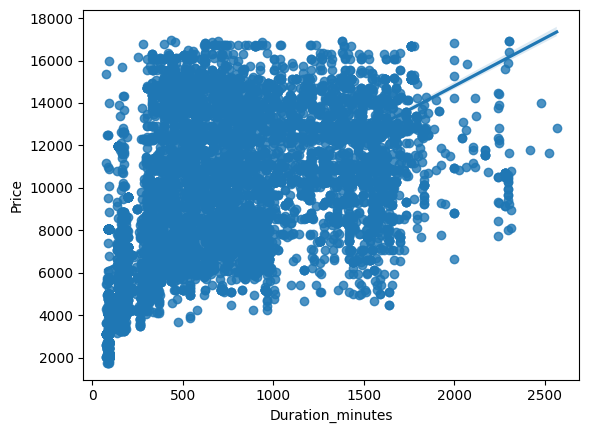

In [15]:
sns.regplot(x='Duration_minutes',y='Price',data=df)

In [16]:
df=df[df['Duration_minutes']<1500]

<Axes: xlabel='Duration_minutes', ylabel='Price'>

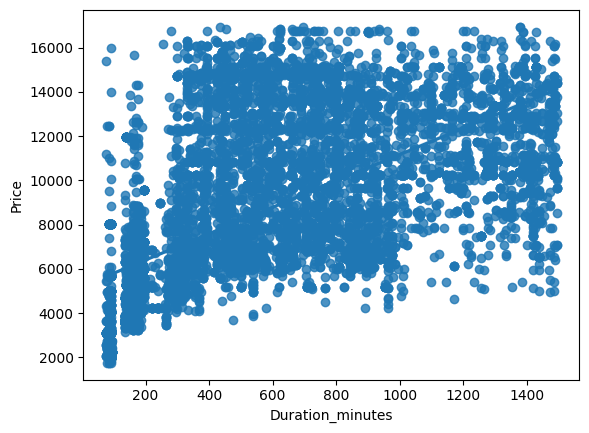

In [17]:
sns.regplot(x='Duration_minutes',y='Price',data=df)

In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Distance_km,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1708.92,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1839.05,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2670.61,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1874.45,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1742.12,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,1546.84,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,1546.84,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,1708.92,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1708.92,160


In [19]:
def stops(x) : 
    if x== 'non-stop' :
        return 0
    if x== '1 stop' :
        return 1
    if x== 2 :
        return 2
    else :
        return 1
df['Total_Stops'] = df['Total_Stops'].apply(stops)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Distance_km,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1708.92,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,7662,1839.05,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,No info,13882,2670.61,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,1874.45,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1742.12,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,1546.84,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,1546.84,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,1708.92,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1708.92,160


In [20]:
#drop.columns('Duration','Additional_Info','Arrival_Time')
df.drop(['Duration','Additional_Info'],axis=1,inplace=True)
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Route_Distance_km,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,3897,1708.92,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,1,7662,1839.05,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1,13882,2670.61,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,6218,1874.45,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,13302,1742.12,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,4107,1546.84,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,4145,1546.84,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,0,7229,1708.92,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,12648,1708.92,160


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9456 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            9456 non-null   object 
 1   Date_of_Journey    9456 non-null   object 
 2   Source             9456 non-null   object 
 3   Destination        9456 non-null   object 
 4   Route              9455 non-null   object 
 5   Dep_Time           9456 non-null   object 
 6   Arrival_Time       9456 non-null   object 
 7   Total_Stops        9456 non-null   int64  
 8   Price              9456 non-null   int64  
 9   Route_Distance_km  9456 non-null   float64
 10  Duration_minutes   9456 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 886.5+ KB


In [22]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Day'] = df['Date_of_Journey'].dt.day_name()
df['Month'] = df['Date_of_Journey'].dt.month_name()
df['Year'] = df['Date_of_Journey'].dt.year
df['Day_number'] = df['Date_of_Journey'].dt.day
df.drop('Date_of_Journey', axis=1, inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Route_Distance_km,Duration_minutes,Day,Month,Year,Day_number
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,3897,1708.92,170,Sunday,March,2019,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,1,7662,1839.05,445,Wednesday,May,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1,13882,2670.61,1140,Sunday,June,2019,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,6218,1874.45,325,Sunday,May,2019,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,13302,1742.12,285,Friday,March,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,4107,1546.84,150,Tuesday,April,2019,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,4145,1546.84,155,Saturday,April,2019,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0,7229,1708.92,180,Saturday,April,2019,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,12648,1708.92,160,Friday,March,2019,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9456 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            9456 non-null   object 
 1   Source             9456 non-null   object 
 2   Destination        9456 non-null   object 
 3   Route              9455 non-null   object 
 4   Dep_Time           9456 non-null   object 
 5   Arrival_Time       9456 non-null   object 
 6   Total_Stops        9456 non-null   int64  
 7   Price              9456 non-null   int64  
 8   Route_Distance_km  9456 non-null   float64
 9   Duration_minutes   9456 non-null   int64  
 10  Day                9456 non-null   object 
 11  Month              9456 non-null   object 
 12  Year               9456 non-null   int32  
 13  Day_number         9456 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(8)
memory usage: 1.0+ MB


In [24]:
df.value_counts('Airline')

Airline
Jet Airways                          3177
IndiGo                               2050
Air India                            1342
Multiple carriers                    1138
SpiceJet                              817
Vistara                               405
Air Asia                              319
GoAir                                 191
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [25]:
counts = df['Airline'].value_counts()
df['Airline'] = df['Airline'].apply (lambda x : 'other ' if counts[x] < 150 else x)

df['Airline'].value_counts()

Airline
Jet Airways          3177
IndiGo               2050
Air India            1342
Multiple carriers    1138
SpiceJet              817
Vistara               405
Air Asia              319
GoAir                 191
other                  17
Name: count, dtype: int64

In [26]:
df['Source'].value_counts()

Source
Delhi       3925
Kolkata     2505
Banglore    1982
Mumbai       664
Chennai      380
Name: count, dtype: int64

In [27]:
df['Destination'].value_counts()

Destination
Cochin       3925
Banglore     2505
Delhi        1265
New Delhi     717
Hyderabad     664
Kolkata       380
Name: count, dtype: int64

In [28]:
df['Route'].value_counts()

Route
DEL → BOM → COK                2177
BLR → DEL                      1542
CCU → BOM → BLR                 865
CCU → BLR                       723
BOM → HYD                       619
                               ... 
CCU → DEL → VGA → BLR             1
BLR → GAU → DEL                   1
BOM → BHO → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
BOM → BBI → HYD                   1
Name: count, Length: 107, dtype: int64

In [29]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Route_Distance_km,Duration_minutes,Day,Month,Year,Day_number
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,3897,1708.92,170,Sunday,March,2019,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,1,7662,1839.05,445,Wednesday,May,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1,13882,2670.61,1140,Sunday,June,2019,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,6218,1874.45,325,Sunday,May,2019,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,13302,1742.12,285,Friday,March,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,4107,1546.84,150,Tuesday,April,2019,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,4145,1546.84,155,Saturday,April,2019,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0,7229,1708.92,180,Saturday,April,2019,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,12648,1708.92,160,Friday,March,2019,1


In [30]:
df['Dep_Time']= pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']= pd.to_datetime(df['Arrival_Time'])

In [31]:
df['Dept_hour']=df['Dep_Time'].dt.hour
df['Dept_Day_Quarter']=df['Dept_hour'].apply(lambda x: 'morning 6-12' if 6<= x < 12 else 'afternoon 12-18' if 12<= x < 18 else 'night 18-24' if 18 <= x <=23  else 'late_night 24-6')
df['Arrivel_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Day_Quarter']=df['Arrivel_hour'].apply(lambda x: 'morning 6-12' if 6<= x < 12 else 'afternoon 12-18' if 12<= x < 18 else 'night 18-24' if 18 <= x <=23  else 'late_night 24-6')
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Route_Distance_km,Duration_minutes,Day,Month,Year,Day_number,Dept_hour,Dept_Day_Quarter,Arrivel_hour,Arrival_Day_Quarter
0,IndiGo,Banglore,New Delhi,BLR → DEL,2026-01-04 22:20:00,2026-03-22 01:10:00,0,3897,1708.92,170,Sunday,March,2019,24,22,night 18-24,1,late_night 24-6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-04 05:50:00,2026-01-04 13:15:00,1,7662,1839.05,445,Wednesday,May,2019,1,5,late_night 24-6,13,afternoon 12-18
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-04 09:25:00,2026-06-10 04:25:00,1,13882,2670.61,1140,Sunday,June,2019,9,9,morning 6-12,4,late_night 24-6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2026-01-04 18:05:00,2026-01-04 23:30:00,1,6218,1874.45,325,Sunday,May,2019,12,18,night 18-24,23,night 18-24
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2026-01-04 16:50:00,2026-01-04 21:35:00,1,13302,1742.12,285,Friday,March,2019,1,16,afternoon 12-18,21,night 18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2026-01-04 19:55:00,2026-01-04 22:25:00,0,4107,1546.84,150,Tuesday,April,2019,9,19,night 18-24,22,night 18-24
10679,Air India,Kolkata,Banglore,CCU → BLR,2026-01-04 20:45:00,2026-01-04 23:20:00,0,4145,1546.84,155,Saturday,April,2019,27,20,night 18-24,23,night 18-24
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2026-01-04 08:20:00,2026-01-04 11:20:00,0,7229,1708.92,180,Saturday,April,2019,27,8,morning 6-12,11,morning 6-12
10681,Vistara,Banglore,New Delhi,BLR → DEL,2026-01-04 11:30:00,2026-01-04 14:10:00,0,12648,1708.92,160,Friday,March,2019,1,11,morning 6-12,14,afternoon 12-18


In [32]:
df_price=df['Price']
df_price.to_csv('df_price.csv')

In [33]:
df['Price_Log'] = np.log1p(df['Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9456 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9456 non-null   object        
 1   Source               9456 non-null   object        
 2   Destination          9456 non-null   object        
 3   Route                9455 non-null   object        
 4   Dep_Time             9456 non-null   datetime64[ns]
 5   Arrival_Time         9456 non-null   datetime64[ns]
 6   Total_Stops          9456 non-null   int64         
 7   Price                9456 non-null   int64         
 8   Route_Distance_km    9456 non-null   float64       
 9   Duration_minutes     9456 non-null   int64         
 10  Day                  9456 non-null   object        
 11  Month                9456 non-null   object        
 12  Year                 9456 non-null   int32         
 13  Day_number           9456 non-null   

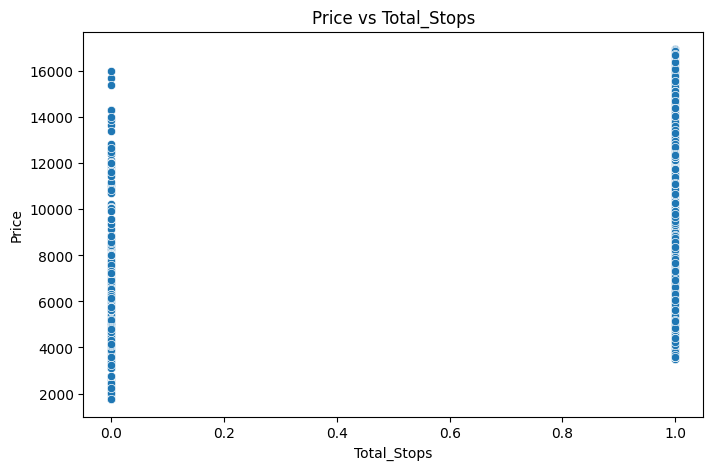

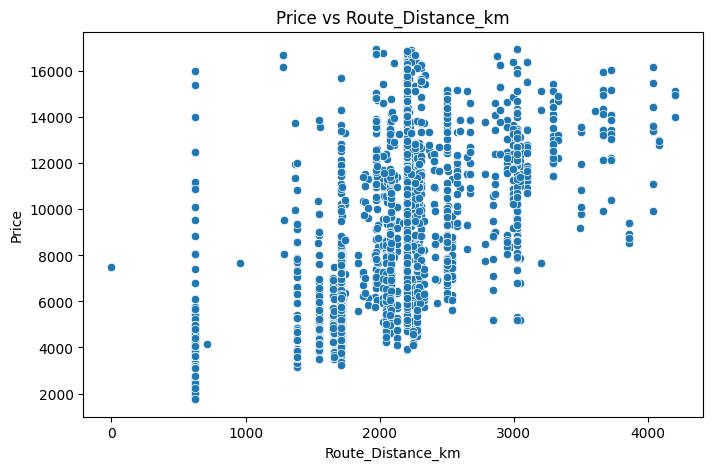

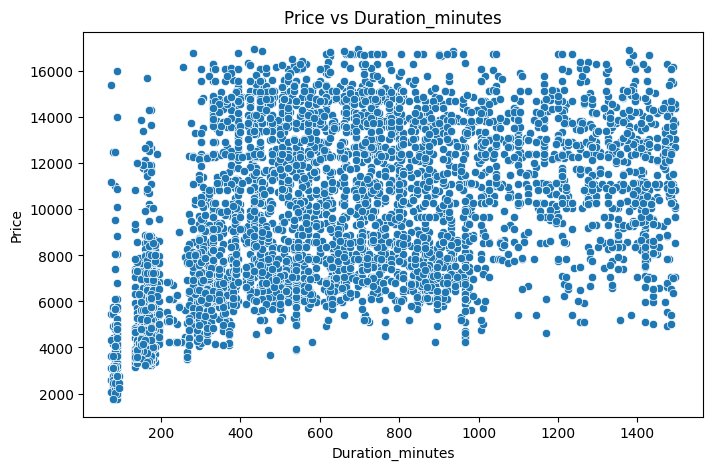

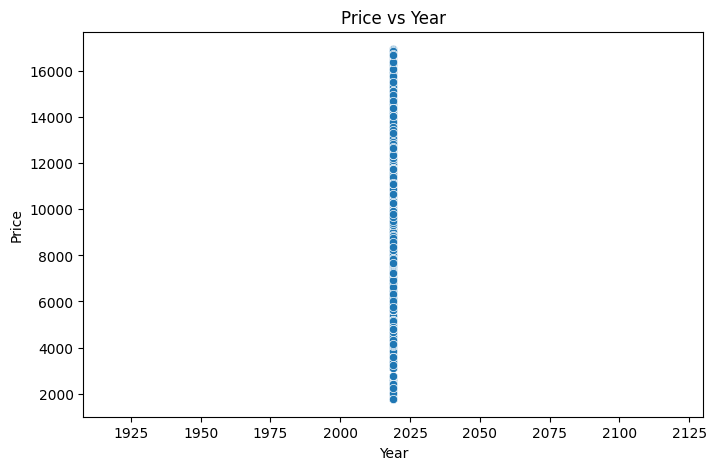

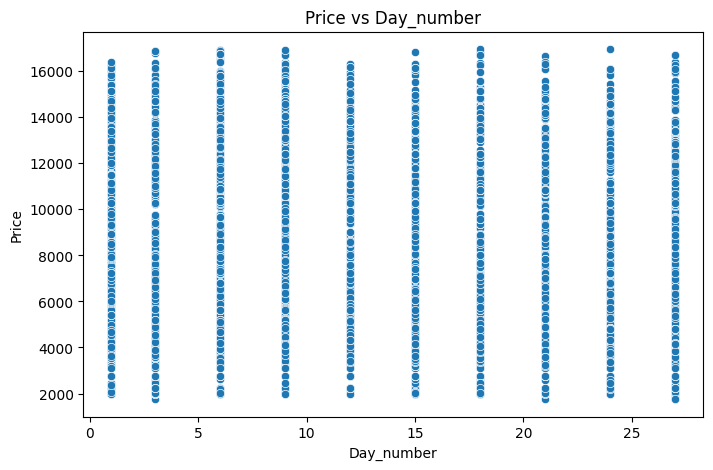

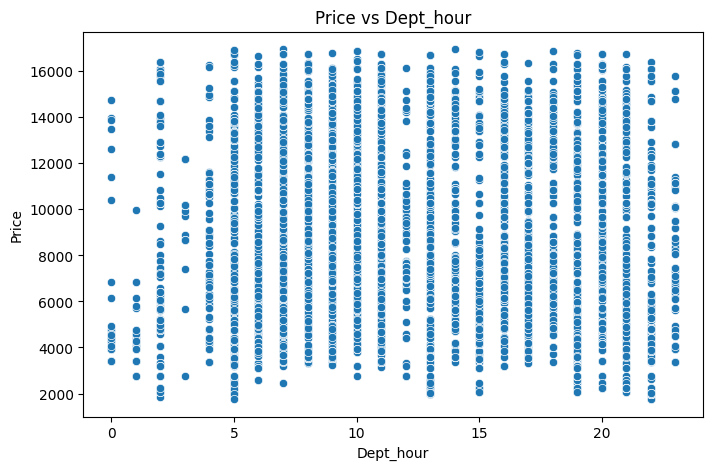

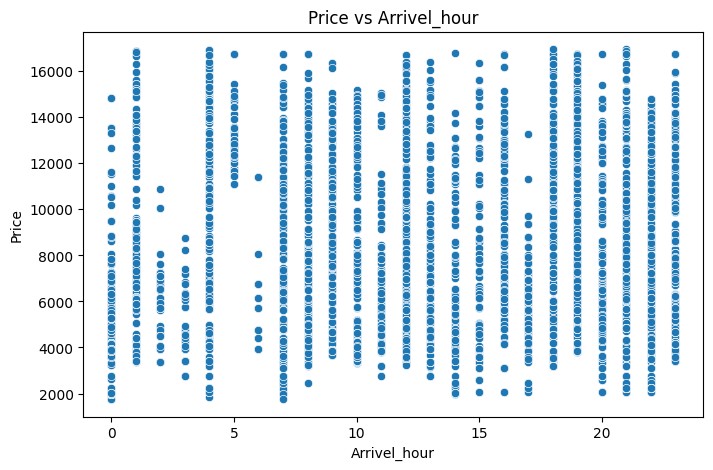

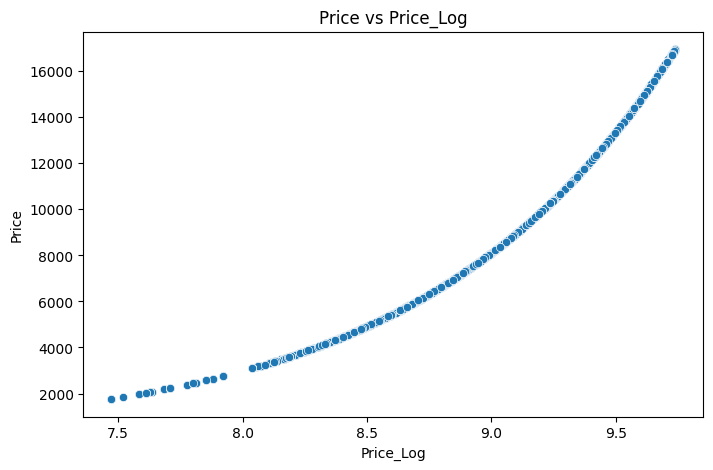

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select only the specific numerical types you requested
# Note: 'float' usually covers float32 and float64
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float']).columns.tolist()

# 2. Remove 'Price' from the list (so we don't plot Price vs Price)
if 'Price' in numerical_cols:
    numerical_cols.remove('Price')

# 3. Loop through the columns and create scatter plots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    
    # x = numerical column, y = Price
    sns.scatterplot(data=df, x=col, y='Price')
    
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [35]:
df= df.drop([#'Dep_Time'
#'Arrival_Time', 
'Price'],axis=1)


In [36]:
df['speed'] = df['Route_Distance_km'] / (df['Duration_minutes'] / 60)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9456 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9456 non-null   object        
 1   Source               9456 non-null   object        
 2   Destination          9456 non-null   object        
 3   Route                9455 non-null   object        
 4   Dep_Time             9456 non-null   datetime64[ns]
 5   Arrival_Time         9456 non-null   datetime64[ns]
 6   Total_Stops          9456 non-null   int64         
 7   Route_Distance_km    9456 non-null   float64       
 8   Duration_minutes     9456 non-null   int64         
 9   Day                  9456 non-null   object        
 10  Month                9456 non-null   object        
 11  Year                 9456 non-null   int32         
 12  Day_number           9456 non-null   int32         
 13  Dept_hour            9456 non-null   

In [38]:
df.duplicated().sum()

np.int64(158)

In [39]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [40]:
df['Avrage_speed_per_Route'] = df.groupby('Route')['speed'].transform('mean')

In [41]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Route_Distance_km,Duration_minutes,Day,Month,Year,Day_number,Dept_hour,Dept_Day_Quarter,Arrivel_hour,Arrival_Day_Quarter,Price_Log,speed,Avrage_speed_per_Route
0,IndiGo,Banglore,New Delhi,BLR → DEL,2026-01-04 22:20:00,2026-03-22 01:10:00,0,1708.92,170,Sunday,March,2019,24,22,night 18-24,1,late_night 24-6,8.268219,603.148235,599.553883
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-04 05:50:00,2026-01-04 13:15:00,1,1839.05,445,Wednesday,May,2019,1,5,late_night 24-6,13,afternoon 12-18,8.944159,247.961798,245.763555
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-04 09:25:00,2026-06-10 04:25:00,1,2670.61,1140,Sunday,June,2019,9,9,morning 6-12,4,late_night 24-6,9.538420,140.558421,141.667470
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2026-01-04 18:05:00,2026-01-04 23:30:00,1,1874.45,325,Sunday,May,2019,12,18,night 18-24,23,night 18-24,8.735364,346.052308,346.052308
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2026-01-04 16:50:00,2026-01-04 21:35:00,1,1742.12,285,Friday,March,2019,1,16,afternoon 12-18,21,night 18-24,9.495745,366.762105,366.762105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293,Air Asia,Kolkata,Banglore,CCU → BLR,2026-01-04 19:55:00,2026-01-04 22:25:00,0,1546.84,150,Tuesday,April,2019,9,19,night 18-24,22,night 18-24,8.320692,618.736000,608.175442
9294,Air India,Kolkata,Banglore,CCU → BLR,2026-01-04 20:45:00,2026-01-04 23:20:00,0,1546.84,155,Saturday,April,2019,27,20,night 18-24,23,night 18-24,8.329899,598.776774,608.175442
9295,Jet Airways,Banglore,Delhi,BLR → DEL,2026-01-04 08:20:00,2026-01-04 11:20:00,0,1708.92,180,Saturday,April,2019,27,8,morning 6-12,11,morning 6-12,8.885994,569.640000,599.553883
9296,Vistara,Banglore,New Delhi,BLR → DEL,2026-01-04 11:30:00,2026-01-04 14:10:00,0,1708.92,160,Friday,March,2019,1,11,morning 6-12,14,afternoon 12-18,9.445333,640.845000,599.553883


In [42]:
df = df.drop(['Dep_Time',
'Arrival_Time',
#'Total_Stops',
#'Route',
'Route_Distance_km',
'Duration_minutes',
'Dept_Day_Quarter',
'Arrival_Day_Quarter',
#'Dept_hour',
'Arrivel_hour',
#'Airline',
#'Source',
#'Destination',
'Day',
#'Month',
#'Day_number',
'speed',
'Year',
'Avrage_speed_per_Route'


],axis=1)

In [43]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [44]:
#drop nan values
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891 entries, 0 to 7890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      7891 non-null   object 
 1   Source       7891 non-null   object 
 2   Destination  7891 non-null   object 
 3   Route        7891 non-null   object 
 4   Total_Stops  7891 non-null   int64  
 5   Month        7891 non-null   object 
 6   Day_number   7891 non-null   int32  
 7   Dept_hour    7891 non-null   int32  
 8   Price_Log    7891 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 493.3+ KB


In [45]:
df.to_parquet('df_cleaned.parquet')

PreProssing

In [46]:
x=df.drop('Price_Log',axis=1)
y=df['Price_Log']
x.shape , y.shape

((7891, 8), (7891,))

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,shuffle=True, random_state=42)

In [48]:
x_train.to_parquet('x_train.parquet')
x_test.to_parquet('x_test.parquet')
y_train.to_frame().to_parquet('y_train.parquet')
y_test.to_frame().to_parquet('y_test.parquet')

In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 354 to 7270
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      7101 non-null   object
 1   Source       7101 non-null   object
 2   Destination  7101 non-null   object
 3   Route        7101 non-null   object
 4   Total_Stops  7101 non-null   int64 
 5   Month        7101 non-null   object
 6   Day_number   7101 non-null   int32 
 7   Dept_hour    7101 non-null   int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 443.8+ KB


In [50]:
num_cols = x_train.select_dtypes(include=['int64', 'float', 'int32']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()
cat_cols_2 = ['Month']
cat_cols.remove('Month')
cat_cols , num_cols , cat_cols_2

(['Airline', 'Source', 'Destination', 'Route'],
 ['Total_Stops', 'Day_number', 'Dept_hour'],
 ['Month'])

In [51]:
cv_strategy = KFold(n_splits=7, shuffle=True, random_state=42)


In [52]:
num_pipeline = Pipeline(steps=[
    (('poly',PolynomialFeatures(degree=1)))
])
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ,('poly',PolynomialFeatures(degree=1))
    
])
cat2_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),('poly',PolynomialFeatures(degree=3))
])
preprocessor = ColumnTransformer(transformers=[('num',num_pipeline,num_cols),
('cat',cat_pipeline,cat_cols),('cat2',cat2_pipeline,cat_cols_2)
])
preprocessor


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e

In [53]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('scaler', StandardScaler()),('Histboost',HGBR())])
pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tran

In [54]:
param_grid = {
    # --- 1. Loss & Optimization (Regression Specific) ---
    # 'squared_error': Standard least squares (like MSE).
    # 'absolute_error': Robust to outliers (like MAE).
    # 'poisson': For count data (non-negative integers).
    # 'quantile': For predicting specific percentiles (requires 'quantile' param).
    'Histboost__loss': ['squared_error', 'absolute_error'], 
    
    # Only used if loss='quantile'. Defaults to 0.5 (median).
    # Included here for completeness, though often fixed to 0.5 or 0.9.
    'Histboost__quantile': [0.5], 

    'Histboost__learning_rate': [0.01, 0.1, 0.2], 
    'Histboost__max_iter': [350,400,450],            
    
    # --- 2. Tree Structure (Complexity) ---
    'Histboost__max_leaf_nodes': [55,58,61],   
    'Histboost__max_depth': [None,5,6, 10, 20],       
    'Histboost__min_samples_leaf': [15,17,19,21],      
    
    # --- 3. Regularization ---
    'Histboost__l2_regularization': [0.0,0.5,0.6,0.7, 1.0], 
    'Histboost__max_features': [0.8]  ,     
    
    # --- 4. Binning & Categorical Handling ---
    'Histboost__max_bins': [255],                 
    'Histboost__categorical_features': [None],    
    
    # --- 5. Constraints ---
    'Histboost__monotonic_cst': [None],
    'Histboost__interaction_cst': [None],
    
    # --- 6. Training Control ---
    'Histboost__warm_start': [False],             
    'Histboost__early_stopping': ['auto'],        
    
    # Scoring for regressor is usually negative mean squared error or R2
    'Histboost__scoring': ['loss'],               
    
    'Histboost__validation_fraction': [0.08,0.1,0.2],      
    'Histboost__n_iter_no_change': [10],          
    'Histboost__tol': [1e-7],                     
    
    # --- 7. Miscellaneous ---
    'Histboost__verbose': [0],                    
    'Histboost__random_state': [42]
    
    # REMOVED: 'class_weight' (Not applicable for regression)
}

In [55]:
random_search = RandomizedSearchCV(pipeline, param_grid, verbose=True, n_iter=30, cv=cv_strategy, scoring='r2', n_jobs=-1) #in xgboost the n_jobs must be 1 when  using cuda

In [56]:
random_search.fit(x_train, y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...Regressor())])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'Histboost__categorical_features': [None], 'Histboost__early_stopping': ['auto'], 'Histboost__interaction_cst': [None], 'Histboost__l2_regularization': [0.0, 0.5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-valida

In [57]:
#print the best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'Histboost__warm_start': False, 'Histboost__verbose': 0, 'Histboost__validation_fraction': 0.2, 'Histboost__tol': 1e-07, 'Histboost__scoring': 'loss', 'Histboost__random_state': 42, 'Histboost__quantile': 0.5, 'Histboost__n_iter_no_change': 10, 'Histboost__monotonic_cst': None, 'Histboost__min_samples_leaf': 19, 'Histboost__max_leaf_nodes': 55, 'Histboost__max_iter': 350, 'Histboost__max_features': 0.8, 'Histboost__max_depth': 5, 'Histboost__max_bins': 255, 'Histboost__loss': 'squared_error', 'Histboost__learning_rate': 0.2, 'Histboost__l2_regularization': 1.0, 'Histboost__interaction_cst': None, 'Histboost__early_stopping': 'auto', 'Histboost__categorical_features': None}
Best Score: 0.8769797143190176


In [58]:
joblib.dump(random_search.best_estimator_, 'AirFlights_HistBoost_model.pkl')

['AirFlights_HistBoost_model.pkl']

In [59]:
print("Training Score (R2):", random_search.score(x_train, y_train))
print("Test Score (R2):", random_search.score(x_test, y_test))

Training Score (R2): 0.9039384338323061
Test Score (R2): 0.8846701039211626
